
Copyright © Jaikishan Nishad, 2025. 

This Notebook and its contents were created by Jaikishan.  
All rights reserved.

You may use, share, or modify this notebook for educational and research purposes, provided proper attribution is given.  
For commercial use or other inquiries, please contact me directly.

**Author:** Jaikishan Nishad  
**GitHub:** [JaikishanNishad](https://github.com/Jaikishan1228)  
**Contact:** jaikishannishad33@gmail.com  
**Date:** 14th September 2025



## Brain Tumor Detection Dataset Preparation
### Recommendation: Plese use google colab for this notebook.

You don't have to upadate anything in this notebook. Just run all the cells. 

This notebook demonstrates how to download and prepare the Brain Tumor Detection dataset for YOLOv8 training.  
The dataset will be downloaded to the following path:

- **download_path**: `/content/`

Follow the steps in this notebook to organize the data and set up your environment for model training and evaluation.

In [ ]:
import kagglehub
import zipfile
import os
import shutil
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Define the download path
download_path = '/content/'

# Download latest version
path = kagglehub.dataset_download("pkdarabi/medical-image-dataset-brain-tumor-detection")

print("Path to downloaded dataset files:", path)

dataset_content_path = os.path.join(path, 'BrainTumor') # Assuming the dataset is in a folder named 'BrainTumor' inside the downloaded path
if os.path.exists(dataset_content_path):
    # If the destination directory exists, remove it before copying
    destination_path = os.path.join(download_path, 'BrainTumor')
    if os.path.exists(destination_path):
        shutil.rmtree(destination_path)
        print(f"Removed existing directory: {destination_path}")
    # Use copytree instead of move for read-only file systems
    shutil.copytree(dataset_content_path, destination_path)
    print(f"Dataset copied to: {download_path}")
else:
    print(f"Could not find 'BrainTumor' directory in {path}. Please check the downloaded dataset structure.")

# Define the DATASET_DIR after moving the data
DATASET_DIR = os.path.join(download_path, 'BrainTumor')

print(f"DATASET_DIR is now set to: {DATASET_DIR}")

# Brain Tumor Detection with YOLOv8

This notebook explores the BrainTumorYolov8 dataset and demonstrates how to train a YOLOv8 model for brain tumor detection.

## 1. Import Required Libraries
Import all necessary libraries, including ultralytics (YOLOv8), os, shutil, matplotlib, and others for data handling and visualization.

In [ ]:
# Install required packages if not already installed
!pip install ultralytics matplotlib opencv-python --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.4 MB/s eta 0:00:00


In [ ]:
# Set up paths for BrainTumorYolov8 dataset
DATASET_DIR = os.path.join(os.getcwd(), 'BrainTumor', 'BrainTumorYolov8')
TRAIN_IMAGES = os.path.join(DATASET_DIR, 'train', 'images')
VAL_IMAGES = os.path.join(DATASET_DIR, 'valid', 'images')
TEST_IMAGES = os.path.join(DATASET_DIR, 'test', 'images')

print(f"DATASET_DIR: {DATASET_DIR}")
print(f"TRAIN_IMAGES: {TRAIN_IMAGES}")
print(f"VAL_IMAGES: {VAL_IMAGES}")
print(f"TEST_IMAGES: {TEST_IMAGES}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
DATASET_DIR: /content/BrainTumor/BrainTumorYolov8
TRAIN_IMAGES: /content/BrainTumor/BrainTumorYolov8/train/images
VAL_IMAGES: /content/BrainTumor/BrainTumorYolov8/valid/images
TEST_IMAGES: /content/BrainTumor/BrainTumorYolov8/test/images


## 2. Download and Prepare BrainTumorYolov8 Dataset
Download the BrainTumorYolov8 dataset and organize the files for further processing.

In [ ]:
# If dataset is not already present, provide instructions or code to download/unzip it
# For this notebook, we assume the dataset is already in the correct folder structure at DATASET_DIR
print(f"Dataset directory: {DATASET_DIR}")
print("Contents:", os.listdir(DATASET_DIR))

Dataset directory: /content/BrainTumor/BrainTumorYolov8
Contents: ['valid', 'train', 'test', 'data.yaml']


## 3. Explore Dataset Structure and Sample Images
List the dataset directories and files. Display a few sample images and their corresponding annotation files to understand the dataset format.

Train Images: 2144
Validation Images: 612
Test Images: 308
Label for 1998_jpg.rf.3183a0a9053677dac8ddd9a2747c6fb2.jpg:
 0 0.292479109375 0.688022284375 0.3509749296875 0.688022284375 0.3788300828125 0.651810584375 0.3816155984375 0.6211699171875 0.3621169921875 0.5905292484375 0.32869080781250004 0.5849582171875001 0.2646239546875 0.6128133703125 0.23676880156250002 0.6573816156250001 0.292479109375 0.688022284375


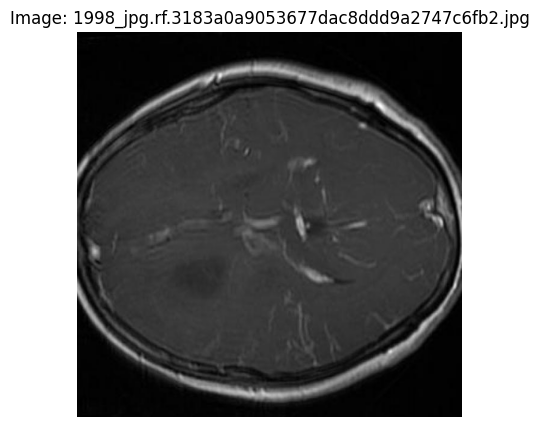

Label for 546_jpg.rf.44d1493a62cf298f7cf2a0b22358bfac.jpg:
 1 0.7047353765625 0.7270194984375 0.6796657374999999 0.71030640625 0.6601671312499999 0.6685236765625 0.571030640625 0.6685236765625 0.54874651875 0.682451253125 0.515320334375 0.7353760453125 0.509749303125 0.799442896875 0.53760445625 0.8718662953124999 0.5849582171875001 0.9080779937499999 0.601671309375 0.8913649031249999 0.6490250703125 0.880222840625 0.688022284375 0.8467966578125001 0.713091921875 0.8161559890625 0.7186629531250001 0.777158775 0.7047353765625 0.7270194984375


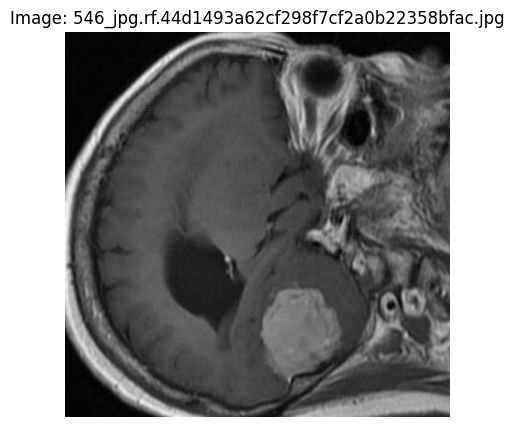

Label for 526_jpg.rf.6871f76faab93ad7ae2b14180d60abd2.jpg:
 1 0.2089136484375 0.2841225625 0.19777158749999998 0.25348189374999996 0.17827298125 0.2423398328125 0.139275765625 0.24791086406249999 0.083565459375 0.28969359375 0.058495821875 0.3231197765625 0.055710306249999994 0.40111420625000005 0.089136490625 0.4373259046875 0.1225626734375 0.45403899687499993 0.1894150421875 0.45125348125000003 0.261838440625 0.3871866296875 0.2646239546875 0.3537604453125 0.25348189374999996 0.3259052921875 0.2089136484375 0.2841225625


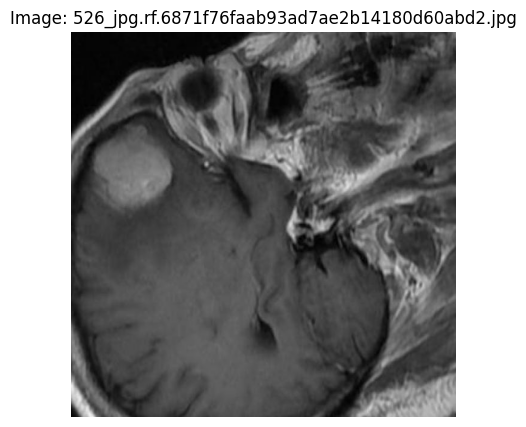

In [ ]:
# List train, val, test directories
print('Train Images:', len(os.listdir(TRAIN_IMAGES)))
print('Validation Images:', len(os.listdir(VAL_IMAGES)))
print('Test Images:', len(os.listdir(TEST_IMAGES)))

# Display a few sample images with their labels
def show_sample_images(image_dir, label_dir, num_samples=3):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]
    for img_file in image_files[:num_samples]:
        img_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, img_file.rsplit('.', 1)[0] + '.txt')
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(f"Image: {img_file}")
        plt.axis('off')
        # Show label file content
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                print(f"Label for {img_file}:\n", f.read())
        plt.show()

show_sample_images(TRAIN_IMAGES, os.path.join(DATASET_DIR, 'train', 'labels'))

## 4. Prepare Data for YOLOv8 Training
Ensure the dataset is structured according to YOLOv8 requirements. Split the data if needed and check annotation format.

In [ ]:
# Check if data.yaml exists and print its contents
yaml_path = os.path.join(DATASET_DIR, 'data.yaml')
if os.path.exists(yaml_path):
    with open(yaml_path, 'r') as f:
        print(f.read())
else:
    print('data.yaml not found! Please create one for YOLOv8.')

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['glioma', 'meningioma', 'pituitary']




## 5. Configure YOLOv8 Model for Custom Dataset
Create or review the YOLOv8 configuration YAML file specifying dataset paths, class names, and other parameters.

In [ ]:
# Example: If you need to create or update data.yaml
import yaml
import os

# Define DATASET_DIR and yaml_path here
DATASET_DIR = os.path.join('/content/', 'BrainTumor')
yaml_path = os.path.join(DATASET_DIR, 'data.yaml')


data_yaml = {
    'train': os.path.join('/content/', 'BrainTumor', 'train', 'images'), # Use absolute path
    'val': os.path.join('/content/', 'BrainTumor', 'valid', 'images'),   # Use absolute path
    'test': os.path.join('/content/', 'BrainTumor', 'test', 'images'),   # Use absolute path
    'nc': 3,  # Updated with actual number of classes
    'names': ['glioma', 'meningioma', 'pituitary']  # Updated with actual class names
}

with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f)
print('data.yaml created/updated for YOLOv8 with absolute paths.')

data.yaml created/updated for YOLOv8 with absolute paths.


## 6. Train YOLOv8 Model
Use the ultralytics YOLOv8 API to train the model on the custom dataset. Set training parameters such as epochs, batch size, and image size.

In [ ]:
import os
from ultralytics import YOLO
import yaml

# Define DATASET_DIR and yaml_path here
DATASET_DIR = os.path.join('/content/', 'BrainTumor')
yaml_path = os.path.join(DATASET_DIR, 'data.yaml')

# Check if data.yaml exists and print its contents
if os.path.exists(yaml_path):
    print(f"Found data.yaml at: {yaml_path}")
    with open(yaml_path, 'r') as f:
        data_yaml_content = yaml.safe_load(f)
        print("data.yaml content:")
        print(data_yaml_content)

    # Verify image directories from data.yaml
    train_img_dir = os.path.join(DATASET_DIR, data_yaml_content.get('train').replace('../', ''))
    val_img_dir = os.path.join(DATASET_DIR, data_yaml_content.get('val').replace('../', ''))
    test_img_dir = os.path.join(DATASET_DIR, data_yaml_content.get('test').replace('../', ''))

    print(f"Checking training image directory: {train_img_dir}")
    print(f"Exists: {os.path.exists(train_img_dir)}")
    if os.path.exists(train_img_dir):
        print(f"Number of files in training image directory: {len(os.listdir(train_img_dir))}")


    print(f"Checking validation image directory: {val_img_dir}")
    print(f"Exists: {os.path.exists(val_img_dir)}")
    if os.path.exists(val_img_dir):
        print(f"Number of files in validation image directory: {len(os.listdir(val_img_dir))}")

    print(f"Checking test image directory: {test_img_dir}")
    print(f"Exists: {os.path.exists(test_img_dir)}")
    if os.path.exists(test_img_dir):
        print(f"Number of files in test image directory: {len(os.listdir(test_img_dir))}")

else:
    print(f"Error: data.yaml not found at: {yaml_path}")


# Train YOLOv8 model
model = YOLO('yolov8n.pt')  # You can use yolov8s.pt, yolov8m.pt, etc.

results = model.train(
    data='/content/BrainTumor/BrainTumorYolov8/data.yaml', # Directly passing the string path
    epochs=20,           # Adjust epochs as needed
    imgsz=640,           # Image size
    batch=8,             # Adjust batch size as needed
    project='yolov8_brain_tumor',
    name='exp1',
    exist_ok=True
)
print('Training complete!')

# Save the trained model to the models folder
os.makedirs('models', exist_ok=True)
model_path = os.path.join('models', 'yolov8_brain_tumor.pt')
model.save(model_path)
print(f'Trained model saved to {model_path}')

Found data.yaml at: /content/BrainTumor/data.yaml
data.yaml content:
{'names': ['glioma', 'meningioma', 'pituitary'], 'nc': 3, 'test': '/content/BrainTumor/test/images', 'train': '/content/BrainTumor/train/images', 'val': '/content/BrainTumor/valid/images'}
Checking training image directory: /content/BrainTumor/train/images
Exists: False
Checking validation image directory: /content/BrainTumor/valid/images
Exists: False
Checking test image directory: /content/BrainTumor/test/images
Exists: False
Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/BrainTumor/BrainTumorYolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, em

## 8. Visualize Predictions on Sample Images
Run inference on a few sample images and visualize the predicted bounding boxes alongside ground truth annotations.


image 1/1 /content/BrainTumor/BrainTumorYolov8/valid/images/810_jpg.rf.8b0252bbe0bb68dae0ce2e68111c62c7.jpg: 640x640 1 glioma, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


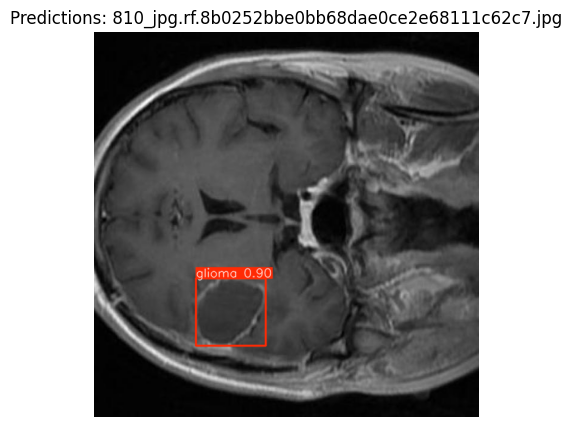


image 1/1 /content/BrainTumor/BrainTumorYolov8/valid/images/2973_jpg.rf.f0d151e611d63e53e6dd4e8b633abce0.jpg: 640x640 1 glioma, 9.8ms
Speed: 3.2ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


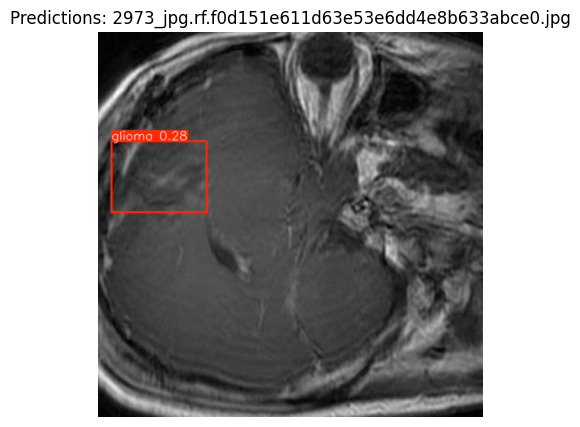


image 1/1 /content/BrainTumor/BrainTumorYolov8/valid/images/1415_jpg.rf.5df913fffd917e019b450f2fdff865cb.jpg: 640x640 1 pituitary, 10.3ms
Speed: 2.3ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


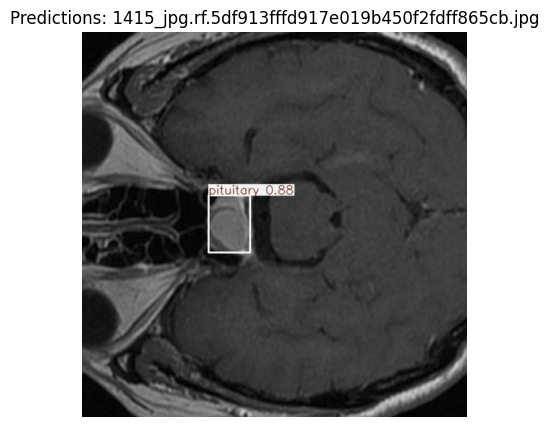

In [ ]:
# Visualize predictions on sample validation images
def visualize_predictions(model, image_dir, num_samples=3):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]
    for img_file in image_files[:num_samples]:
        img_path = os.path.join(image_dir, img_file)
        results = model(img_path)
        res_plotted = results[0].plot()
        plt.figure(figsize=(5, 5))
        plt.imshow(res_plotted)
        plt.title(f"Predictions: {img_file}")
        plt.axis('off')
        plt.show()

# Assuming 'model' object from training is available, otherwise load the best model
if 'model' in locals():
    visualize_predictions(model, VAL_IMAGES)
else:
    print("Model object not found. Please ensure the model is loaded or trained.")

## 9. Predict on Custom Images
Use the trained YOLOv8 model to perform inference on a new, unseen image and visualize the predictions.

In [13]:
# Detect cancer in an image and save results in the 'runs' folder
from ultralytics import YOLO
import os

# Load the trained model (update the path if needed)
model = YOLO("yolov8_brain_tumor/exp1/weights/best.pt")

# 
image_path = "https://medicine.washu.edu/app/uploads/2021/02/GlioblastomaBranScans-700x467.jpg"

# Run prediction and save results in 'runs/cancer_detection'
results = model.predict(
    image_path,
    save=True,
    project="runs",
    name="cancer_detection"
)
print("Detection complete. Results saved in 'runs/cancer_detection'.")

100%|██████████| 59.6k/59.6k [00:00<00:00, 1.34MB/s]


image 1/1 c:\Users\jaiki\Desktop\Cancer_Detection\GlioblastomaBranScans-700x467.jpg: 448x640 4 gliomas, 1 meningioma, 793.8ms
Speed: 5.0ms preprocess, 793.8ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\cancer_detection2
Detection complete. Results saved in 'runs/cancer_detection'.


In [16]:
# Detect cancer in an image and save results in the 'runs' folder
from ultralytics import YOLO
import os

# Load the trained model (update the path if needed)
model = YOLO("yolov8_brain_tumor/exp1/weights/best.pt")

# You can paste your image location
image_path = "https://www.mdpi.com/ijms/ijms-23-01187/article_deploy/html/images/ijms-23-01187-g001.png"

# Run prediction and save results in 'runs/cancer_detection'
results = model.predict(
    image_path,
    save=True,
    project="runs",
    name="cancer_detection"
)
print("Detection complete. Results saved in 'runs/cancer_detection'.")


 Download failure, retrying 1/3 https://www.mdpi.com/ijms/ijms-23-01187/article_deploy/html/images/ijms-23-01187-g001.png...
image 1/1 c:\Users\jaiki\Desktop\Cancer_Detection\ijms-23-01187-g001.png: 640x576 4 meningiomas, 917.1ms
Speed: 8.0ms preprocess, 917.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs\cancer_detection3
Detection complete. Results saved in 'runs/cancer_detection'.



image 1/1 c:\Users\jaiki\Desktop\Cancer_Detection\Screenshot 2025-09-13 234516.png: 640x640 1 glioma, 87.2ms
Speed: 5.3ms preprocess, 87.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 c:\Users\jaiki\Desktop\Cancer_Detection\Screenshot 2025-09-13 234516.png: 640x640 1 glioma, 87.2ms
Speed: 5.3ms preprocess, 87.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


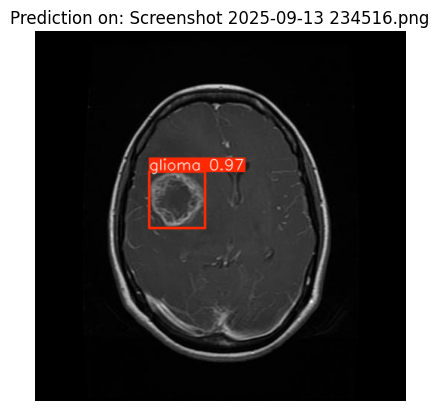

Detected: glioma | Confidence: 0.97 | BBox: [151.95120239257812, 186.486083984375, 225.84518432617188, 261.585693359375]


In [18]:
# Short version: Predict and visualize on a custom image
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

img = 'Screenshot 2025-09-13 234516.png'
model_path = 'models/yolov8_brain_tumor.pt'

if os.path.exists(img) and os.path.exists(model_path):
    model = YOLO(model_path)
    results = model(img)
    if results:
        plt.imshow(results[0].plot())
        plt.axis('off')
        plt.title(f"Prediction on: {os.path.basename(img)}")
        plt.show()
        for r in results:
            if getattr(r, 'boxes', None) and len(r.boxes) > 0:
                for box in r.boxes:
                    print(f"Detected: {model.names[int(box.cls)]} | Confidence: {float(box.conf):.2f} | BBox: {box.xyxy[0].tolist()}")
            else:
                print("No objects detected.")
    else:
        print("No results.")
else:
    print(f"Missing file: {img if not os.path.exists(img) else model_path}")


Copyright © Jaikishan Nishad, 2025. 

This Notebook and its contents were created by Jaikishan.  
All rights reserved.

You may use, share, or modify this notebook for educational and research purposes, provided proper attribution is given.  
For commercial use or other inquiries, please contact me directly.

**Author:** Jaikishan Nishad  
**GitHub:** [JaikishanNishad](https://github.com/Jaikishan1228)  
**Contact:** jaikishannishad33@gmail.com  
**Date:** 14th September 2025

